# Getting Started with Matplotlib

![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

## Objectives:

1. Download matplotlib
2. Understanding matplotlib figures
3. Create a basic plot
4. Using matplotlib to create a geophysical plot
5. Making a plotting script

## Other Resources:
- matplotlib hosted on github: https://github.com/matplotlib/matplotlib

## Set up
First, we are going to need to install matplotlib (and numpy if you haven't from the previous session) into your conda environment. You can do that straight from the jupyter notebook by running the cell below.

After installing these packages, you will want to restart the Kernel. You can do this by going to the Kernel tab in Jupyter lab and clicking `Restart Kernel`.

Next, we can set matplotlib to display all plots created inline in this Jupyter notebook by using the following magic command.

In [1]:
%matplotlib inline

And finally, we can import matplotlib and numpy into the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

For the purpose of clarity, notice that we are importing [matplotlib's pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) interface as plt.

## Anatomy of a matplotlib figure

![Matplotlib logo](https://matplotlib.org/stable/_images/anatomy.png)

Matplotlib has two core objects: [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html) and [Axes](https://matplotlib.org/stable/api/axes_api.html). The `Figure` keeps track of all the child `Axes` or other [Artists](https://matplotlib.org/stable/api/artist_api.html). Almost everything in a matplotlib figure is a type of `Artist`, including `Figure`s and `Axes` themselves. Other types of `Artist`s include [Text](https://matplotlib.org/stable/api/text_api.html) and [Legend](https://matplotlib.org/stable/api/legend_api.html), for example.

## Basic plot

Use numpy to define two small arrays.

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 5, 1])

Create a plot with matplotlib by making a figure, the axes, and then plotting.

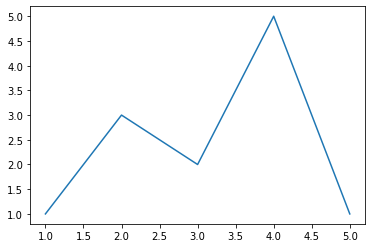

In [4]:
# Create a figure
fig = plt.figure()

# Add axes to the figure on a 1x1 grid, of which this is in the first position
ax = fig.add_subplot(1, 1, 1)

# Plot the x and y variables created above from the axes object.
ax.plot(x,y);

However, you don't explicity have to call the figure and axes before making a plot. Many matplotlib calls will make them for you. For instance, the same plot can be created in one call:

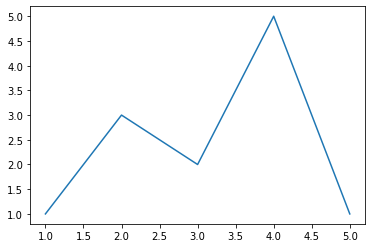

In [5]:
plt.plot(x,y);

There are lots of different ways to make a plot and reference it's figure and axes. Below, we create a figure explicitly, and then use `plt.gca()` to get the current axes.

Using [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) we can provide many optional input arguments that change the way a plot looks. 

We can also add titles and axes lables to the figure.

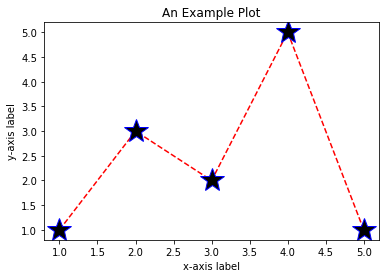

In [6]:
fig = plt.figure()
ax = plt.gca()

ax.plot(x,y, color='red', ls='--', marker='*', 
        markersize=25, markerfacecolor='k',
       mec='b')

ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('An Example Plot');


In [7]:
plt.clf();
plt.cla();
plt.close();

## Plotting the Southern Oscillation Index

This part of the tutorial is a version of a [GeoCAT-Examples plot](https://geocat-examples.readthedocs.io/en/latest/gallery/XY/NCL_xy_5.html#sphx-glr-gallery-xy-ncl-xy-5-py) that has been simplified for the purposes of this tutorial. For way more geoscience examples that recreate original NCL examples, see the [GeoCAT-Examples gallery](https://geocat-examples.readthedocs.io/en/latest/).

We're going to use a python module called [pickle](https://docs.python.org/3/library/pickle.html). Pickle allows us to convert Python objects can be saved as binary files. You don't need to worry about it, other than it is convenient. Note that pickle files are not secure, though, and make sure you trust the files you use.

In [8]:
import pickle

Load the date from the picke file. 

In [9]:
# open the binary file
infile = open('soi.pkl', 'rb')

# the three variables are stored in a single array, 
# can be unpacked in the load call directly
[date, soi, dsoi] = pickle.load(infile)

# close the file
infile.close()

Make a figure, similar to above, and plot the data to see what it looks like.

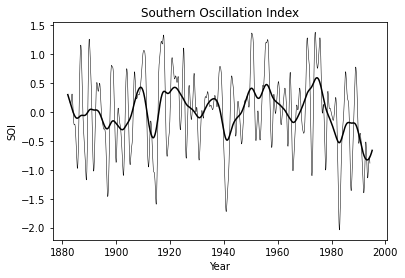

In [30]:
# Plot data
fig = plt.figure()
ax = plt.gca()

# Label the axes
plt.xlabel('Year')
plt.ylabel('SOI')

# Set plot title
plt.title('Southern Oscillation Index')

ax.plot(date, soi, color='black', linewidth=0.5)
ax.plot(date, dsoi, color='black');

It's kind of hard to tell what's happening. Let's add a line through y=0.

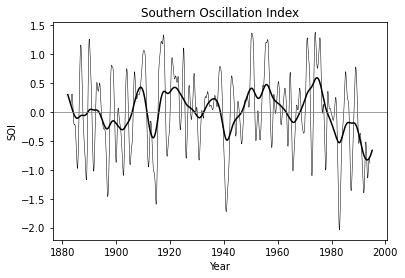

In [31]:
# Add horizonal line
ax.axhline(y=0, color='grey', linewidth=0.75)
fig

We can also compress and center the y axis to more clearly see the data. Lets also change the figure size to extend the x-axis.

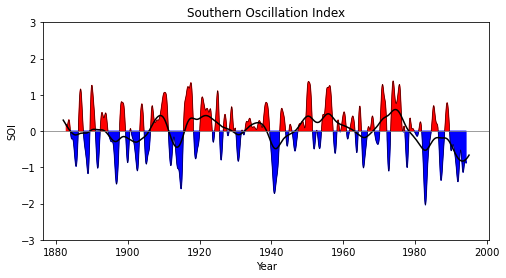

In [37]:
# set axis range
ax.set_ylim([-3,3])

# Set figure size
fig.set_size_inches(8,4)

fig

And let's add some colors to the plot, shading it red above y=0 and blue below y=0

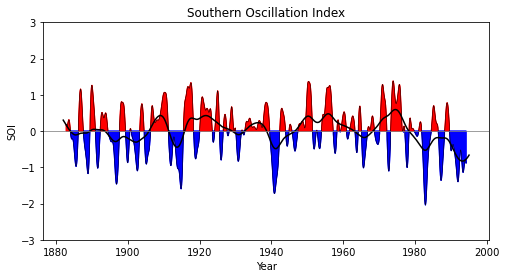

In [38]:
# Fill above and below y=0
ax.fill_between(date, soi, where=soi > 0, color='red')
ax.fill_between(date, soi, where=soi < 0, color='blue')
fig